In [35]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
from src.data_loading.data_load_save_utils import filter_match_ids_for_team
from src.wyscout_utils import Wyscout
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mplsoccer import *
import ast
from adjustText import adjust_text

In [36]:
denmark_games = filter_match_ids_for_team('Denmark')
denmark_games
for i in range(len(denmark_games)):
    wys_id = denmark_games.iloc[i]['wyscout']
    wys_data_id = Wyscout(wys_id, tuple(denmark_games.iloc[i][['home', 'away', 'date']])).events_df
    if i == 0:
        wys_data = wys_data_id
    else:
        wys_data = pd.concat([wys_data, wys_data_id], axis=0)

Wyscout data for match 5414106 unzipped ...
-- See path: \Users\Nerchio\Desktop\Soccer Analysis\h5-soccer-analytics-codebase\h5_data\Denmark_Finland_2023-03-23\wyscout\json_files
Skillcorner data for match 5414106 loaded ...
Match: Denmark vs Finland on 2023-03-23
Wyscout data for match 5414155 unzipped ...
-- See path: \Users\Nerchio\Desktop\Soccer Analysis\h5-soccer-analytics-codebase\h5_data\Denmark_Northern Ireland_2023-06-16\wyscout\json_files
Skillcorner data for match 5414155 loaded ...
Match: Denmark vs Northern Ireland on 2023-06-16
Wyscout data for match 5414202 unzipped ...
-- See path: \Users\Nerchio\Desktop\Soccer Analysis\h5-soccer-analytics-codebase\h5_data\Denmark_San Marino_2023-09-07\wyscout\json_files
Skillcorner data for match 5414202 loaded ...
Match: Denmark vs San Marino on 2023-09-07
Wyscout data for match 5414263 unzipped ...
-- See path: \Users\Nerchio\Desktop\Soccer Analysis\h5-soccer-analytics-codebase\h5_data\Denmark_Kazakhstan_2023-10-14\wyscout\json_files

In [ ]:
wys_data['type.primary'].value_counts()

In [ ]:
throw_in_data = wys_data[wys_data['type.primary'] == 'throw_in']
throw_in_data = throw_in_data.dropna(axis=1, how='all')
throw_in_data = throw_in_data[throw_in_data['team.name'] == 'Denmark']

In [ ]:
throw_in_data_back = throw_in_data[(throw_in_data['location.x'] >= 0) & (throw_in_data['location.x'] < 30)]
throw_in_data_middle = throw_in_data[(throw_in_data['location.x'] >= 30) & (throw_in_data['location.x'] <= 60)]
throw_in_data_front = throw_in_data[(throw_in_data['location.x'] > 60) & (throw_in_data['location.x'] <= 90)]

In [ ]:
def ratios(data):
    successthrowin = data['possession.types'].value_counts()[0] / data['possession.types'].value_counts().sum() * 100
    attackwithshot = (data['possession.attack.withShot'].value_counts().sum() - data['possession.attack.withShot'].value_counts()[0]) / data['possession.types'].value_counts().sum() * 100
    attackwithshotongoal = (data['possession.attack.withShotOnGoal'].value_counts().sum() - data['possession.attack.withShotOnGoal'].value_counts()[0]) / data['possession.types'].value_counts().sum() * 100
    attackwithgoal = (data['possession.attack.withGoal'].value_counts().sum() - data['possession.attack.withGoal'].value_counts()[0]) / data['possession.types'].value_counts().sum() * 100
    return [successthrowin, attackwithshot, attackwithshotongoal, attackwithgoal]

In [ ]:

ratio_back = ratios(throw_in_data_back)

ratio_middle = ratios(throw_in_data_middle)
ratio_front = ratios(throw_in_data_front)

In [ ]:
print(ratio_back)
print(ratio_middle)
print(ratio_front)

In [37]:
free_kick_data = wys_data[wys_data['type.primary'] == 'free_kick']
free_kick_data = free_kick_data.dropna(axis=1, how='all')
free_kick_data = free_kick_data[free_kick_data['team.name'] == 'Denmark']

In [39]:
free_kick_front = free_kick_data[(free_kick_data['location.x'] > 60) & (free_kick_data['location.x'] <= 90)]
free_kick_front['type.secondary'].value_counts()

[]                                                     27
['free_kick_cross']                                    12
['free_kick_shot', 'opportunity', 'shot']               5
['free_kick_cross', 'shot_assist']                      3
['free_kick_cross', 'second_assist', 'shot_assist']     1
['free_kick_shot', 'shot']                              1
Name: type.secondary, dtype: int64

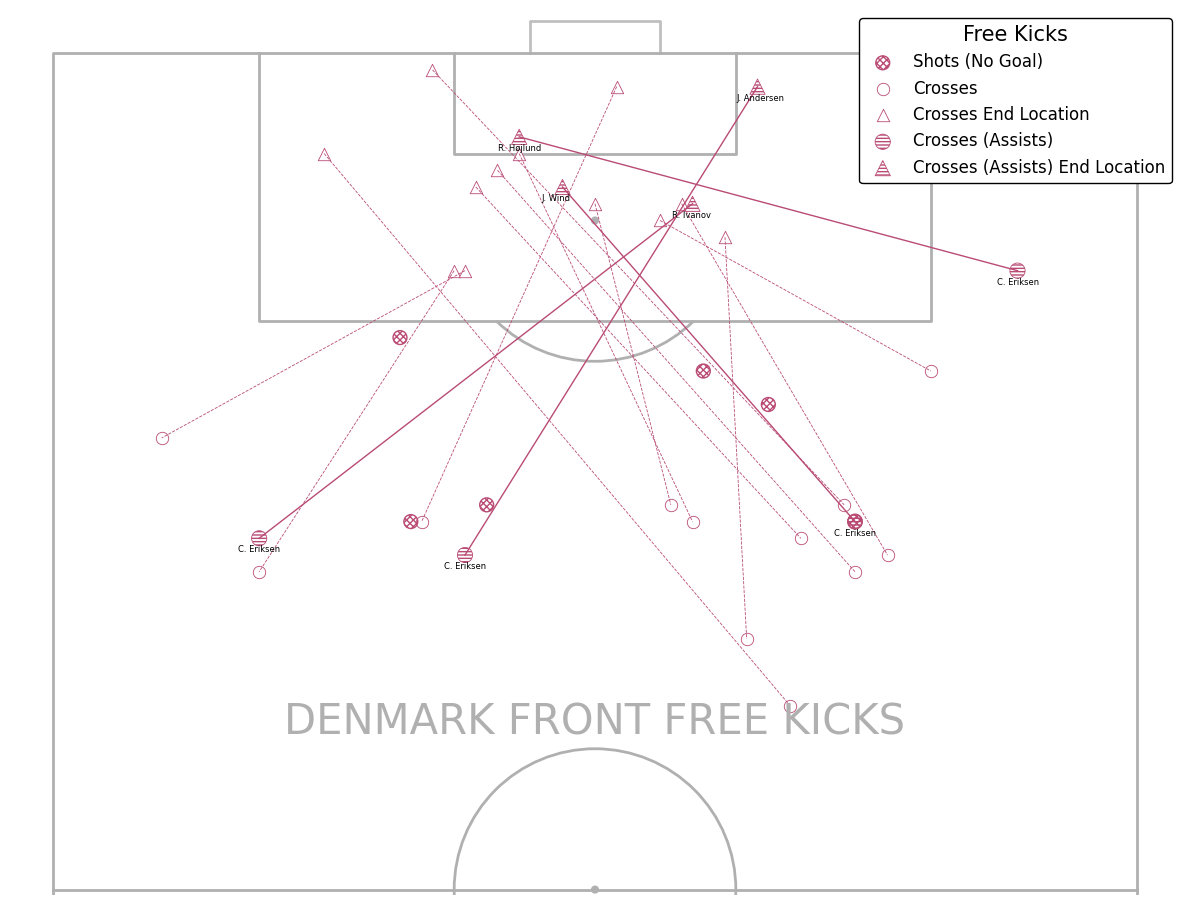

In [51]:

pitch = VerticalPitch(pitch_type='wyscout',
                      pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

# filter goals / non-shot goals
df_shots = free_kick_front[free_kick_front['type.secondary'].str.contains('free_kick_shot')].copy()
df_crosses = free_kick_front[(free_kick_front['type.secondary'].str.contains('free_kick_cross')) & (~ free_kick_front['type.secondary'].str.contains('assist'))].copy()
df_assists = free_kick_front[free_kick_front['type.secondary'].str.contains('assist')].copy()

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch


# plot goal shots with a football marker
# 'edgecolors' sets the color of the pentagons and edges, 'c' sets the color of the hexagons

sc2 = pitch.scatter(df_crosses['pass.endLocation.x'], df_crosses['pass.endLocation.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=80,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='^',
                    ax=ax)

sc3 = pitch.scatter(df_crosses['location.x'], df_crosses['location.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=80,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='o',
                    ax=ax)


sc4 = pitch.scatter(df_assists['pass.endLocation.x'], df_assists['pass.endLocation.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=120,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    hatch = '-----',
                    c='white',
                    marker='^',
                    ax=ax)

sc5 = pitch.scatter(df_assists['location.x'], df_assists['location.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=120,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    hatch = '-----',
                    c='white',
                    marker='o',
                    ax=ax)

sc1 = pitch.scatter(df_shots['location.x'], df_shots['location.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=100,
                    edgecolors='#b94b75',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    hatch = 'xxxxx',
                    marker='o',
                    ax=ax)


for i in range(len(df_assists)):
    pitch.annotate(df_assists['pass.recipient.name'].iloc[i],
                 xy=(df_assists['pass.endLocation.x'].iloc[i], df_assists['pass.endLocation.y'].iloc[i]),
                 xytext=(-10, -15),
                 textcoords='offset points',
                 fontsize=6,
                 color='black',
                 ax =ax)
    
for i in range(len(df_assists)):
    pitch.annotate(df_assists['player.name'].iloc[i],
                 xy=(df_assists['location.x'].iloc[i], df_assists['location.y'].iloc[i]),
                 xytext=(-10, -15),
                 textcoords='offset points',
                 fontsize=6,
                 color='black',
                 ax =ax)



for i in range(len(df_crosses)):
    pitch.plot([df_crosses['pass.endLocation.x'].iloc[i], df_crosses['location.x'].iloc[i]],
            [df_crosses['pass.endLocation.y'].iloc[i], df_crosses['location.y'].iloc[i]],
            color='#b94b75', linestyle='--', linewidth=0.6, ax=ax)

for i in range(len(df_assists)):
    pitch.plot([df_assists['pass.endLocation.x'].iloc[i], df_assists['location.x'].iloc[i]],
            [df_assists['pass.endLocation.y'].iloc[i], df_assists['location.y'].iloc[i]],
            color='#b94b75', linestyle='-', linewidth=1, ax=ax)

ax.legend([sc1, sc3, sc2, sc5, sc4], ['Shots (No Goal)', 'Crosses', 'Crosses End Location', 'Crosses (Assists)', 'Crosses (Assists) End Location'],
          loc='upper right', fontsize=12, title_fontsize=15, title='Free Kicks', facecolor='white', edgecolor='black', framealpha=1)

txt = ax.text(x=50, y=60, s='DENMARK FRONT FREE KICKS',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              color=pitch.line_color,
              va='center', ha='center')

In [45]:
free_kick_front_pass = free_kick_front[free_kick_front['type.secondary']=='[]']

In [48]:

free_kick_mid = free_kick_data[(free_kick_data['location.x'] >= 30) & (free_kick_data['location.x'] <= 60)]
free_kick_mid = pd.concat([free_kick_mid, free_kick_front_pass])
free_kick_mid['type.secondary'].value_counts()

[]    84
Name: type.secondary, dtype: int64

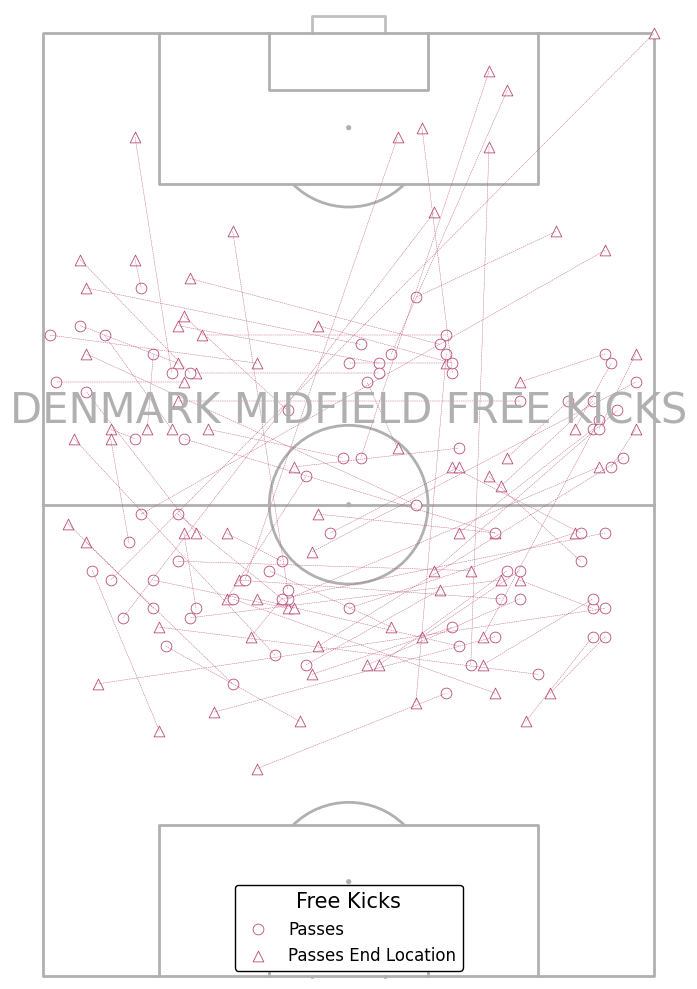

In [55]:

pitch = VerticalPitch(pitch_type='wyscout',
                      pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency


fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch

sc2 = pitch.scatter(free_kick_mid['pass.endLocation.x'], free_kick_mid['pass.endLocation.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=60,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='^',
                    ax=ax)

sc3 = pitch.scatter(free_kick_mid['location.x'], free_kick_mid['location.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=60,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='o',
                    ax=ax)


for i in range(len(free_kick_mid)):
    pitch.plot([free_kick_mid['pass.endLocation.x'].iloc[i], free_kick_mid['location.x'].iloc[i]],
            [free_kick_mid['pass.endLocation.y'].iloc[i], free_kick_mid['location.y'].iloc[i]],
            color='#b94b75', linestyle='--', linewidth=0.3, ax=ax)

ax.legend([sc3, sc2], ['Passes', 'Passes End Location'],
          loc='lower center', fontsize=12, title_fontsize=15, title='Free Kicks', facecolor='white', edgecolor='black', framealpha=1)

txt = ax.text(x=50, y=60, s='DENMARK MIDFIELD FREE KICKS',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              color=pitch.line_color,
              va='center', ha='center')

In [ ]:
corner_data = wys_data[wys_data['type.primary'] == 'corner']
corner_data = corner_data.dropna(axis=1, how='all')
corner_data = corner_data[corner_data['team.name'] == 'Denmark']

In [ ]:
corner_data['type.secondary'].value_counts()

In [ ]:
corner_data['type.secondary'].value_counts()[str(['shot_assist'])] / corner_data['type.secondary'].value_counts().sum() * 100

In [ ]:


pitch = VerticalPitch(pitch_type='wyscout',
                      pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

# filter goals / non-shot goals
cn_assists = corner_data[corner_data['type.secondary'].str.contains('assist')].copy()
cn_passes = corner_data[corner_data['type.secondary'] == str([])].copy()

fig, ax = pitch.draw(figsize=(12, 10))


sc2 = pitch.scatter(cn_passes['pass.endLocation.x'], cn_passes['pass.endLocation.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=80,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='^',
                    ax=ax)

sc3 = pitch.scatter(cn_passes['location.x'], cn_passes['location.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=80,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='o',
                    ax=ax)


sc4 = pitch.scatter(cn_assists['pass.endLocation.x'], cn_assists['pass.endLocation.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=120,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    hatch = '-----',
                    c='white',
                    marker='^',
                    ax=ax)

sc5 = pitch.scatter(cn_assists['location.x'], cn_assists['location.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=120,
                    edgecolors='#b94b75',
                    linewidths= 0.6,
                    hatch = '-----',
                    c='white',
                    marker='o',
                    ax=ax)


for i in range(len(cn_assists)):
    pitch.annotate(cn_assists['pass.recipient.name'].iloc[i],
                 xy=(cn_assists['pass.endLocation.x'].iloc[i], cn_assists['pass.endLocation.y'].iloc[i]),
                 xytext=(-10, -15),
                 textcoords='offset points',
                 fontsize=6,
                 color='black',
                 ax =ax)
    
# for i in range(len(cn_assists)):
#     pitch.annotate(cn_assists['player.name'].iloc[i],
#                  xy=(cn_assists['location.x'].iloc[i], cn_assists['location.y'].iloc[i]),
#                  xytext=(-3*i, -15),
#                  textcoords='offset points',
#                  fontsize=6,
#                  color='black',
#                  ax =ax)

for i in range(len(cn_passes)):
    pitch.plot([cn_passes['pass.endLocation.x'].iloc[i], cn_passes['location.x'].iloc[i]],
            [cn_passes['pass.endLocation.y'].iloc[i], cn_passes['location.y'].iloc[i]],
            color='#b94b75', linestyle='--', linewidth=0.2, ax=ax)

for i in range(len(cn_assists)):
    pitch.plot([cn_assists['pass.endLocation.x'].iloc[i], cn_assists['location.x'].iloc[i]],
            [cn_assists['pass.endLocation.y'].iloc[i], cn_assists['location.y'].iloc[i]],
            color='#b94b75', linestyle='-', linewidth=1, ax=ax)

ax.legend([sc3, sc2, sc5, sc4], ['Passes', 'Passes End Location', 'Passes (Assists)', 'Passes (Assists) End Location'],
          loc='lower center', fontsize=12, title_fontsize=15, title='Corners', facecolor='white', edgecolor='black', framealpha=1)

txt = ax.text(x=50, y=60, s='DENMARK CORNERS',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              color=pitch.line_color,
              va='center', ha='center')

In [57]:
goal_kick_data = wys_data[wys_data['type.primary'] == 'goal_kick']
goal_kick_data = goal_kick_data.dropna(axis=1, how='all')
goal_kick_data = goal_kick_data[goal_kick_data['team.name'] == 'Denmark']

In [58]:
free_kick_back = free_kick_data[(free_kick_data['location.x'] >= 0) & (free_kick_data['location.x'] < 30)]
goal_kick_data = pd.concat([goal_kick_data, free_kick_back])

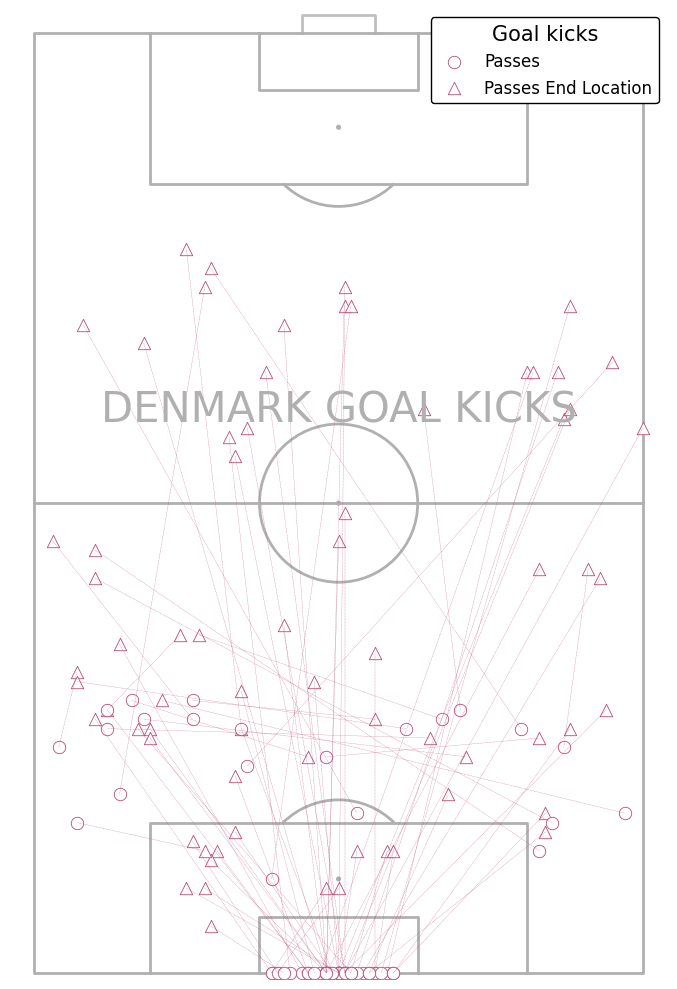

In [61]:

pitch = VerticalPitch(pitch_type='wyscout',
                      pad_bottom=1,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

# filter goals / non-shot goals
# cn_assists = corner_data[corner_data['type.secondary'].str.contains('assist')].copy()
# cn_passes = corner_data[corner_data['type.secondary'] == str([])].copy()

fig, ax = pitch.draw(figsize=(12, 10))


sc2 = pitch.scatter(goal_kick_data['pass.endLocation.x'], goal_kick_data['pass.endLocation.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=80,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='^',
                    ax=ax)

sc3 = pitch.scatter(goal_kick_data['location.x'], goal_kick_data['location.y'],
                    # size varies between 100 and 1900 (points squared)
                    s=80,
                    edgecolors='#b94b75',
                    linewidths=0.6,
                    c='white',
                    marker='o',
                    ax=ax)


# sc4 = pitch.scatter(cn_assists['pass.endLocation.x'], cn_assists['pass.endLocation.y'],
#                     # size varies between 100 and 1900 (points squared)
#                     s=120,
#                     edgecolors='#b94b75',
#                     linewidths=0.6,
#                     hatch = '-----',
#                     c='white',
#                     marker='^',
#                     ax=ax)

# sc5 = pitch.scatter(cn_assists['location.x'], cn_assists['location.y'],
#                     # size varies between 100 and 1900 (points squared)
#                     s=120,
#                     edgecolors='#b94b75',
#                     linewidths= 0.6,
#                     hatch = '-----',
#                     c='white',
#                     marker='o',
#                     ax=ax)


# for i in range(len(goal_kick_data)):
#     pitch.annotate(goal_kick_data['pass.recipient.name'].iloc[i],
#                  xy=(goal_kick_data['pass.endLocation.x'].iloc[i], goal_kick_data['pass.endLocation.y'].iloc[i]),
#                  xytext=(-10, -15),
#                  textcoords='offset points',
#                  fontsize=6,
#                  color='black',
#                  ax =ax)
    
# for i in range(len(cn_assists)):
#     pitch.annotate(cn_assists['player.name'].iloc[i],
#                  xy=(cn_assists['location.x'].iloc[i], cn_assists['location.y'].iloc[i]),
#                  xytext=(-3*i, -15),
#                  textcoords='offset points',
#                  fontsize=6,
#                  color='black',
#                  ax =ax)

for i in range(len(goal_kick_data)):
    pitch.plot([goal_kick_data['pass.endLocation.x'].iloc[i], goal_kick_data['location.x'].iloc[i]],
            [goal_kick_data['pass.endLocation.y'].iloc[i], goal_kick_data['location.y'].iloc[i]],
            color='#b94b75', linestyle='--', linewidth=0.2, ax=ax)

# for i in range(len(cn_assists)):
#     pitch.plot([cn_assists['pass.endLocation.x'].iloc[i], cn_assists['location.x'].iloc[i]],
#             [cn_assists['pass.endLocation.y'].iloc[i], cn_assists['location.y'].iloc[i]],
#             color='#b94b75', linestyle='-', linewidth=1, ax=ax)

ax.legend([sc3, sc2], ['Passes', 'Passes End Location'],
          loc='upper right', fontsize=12, title_fontsize=15, title='Goal kicks', facecolor='white', edgecolor='black', framealpha=1)

txt = ax.text(x=50, y=60, s='DENMARK GOAL KICKS',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              color=pitch.line_color,
              va='center', ha='center')